# Support Vector Regression (SVR)

## Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Importing the dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [3]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [5]:
y = y.reshape(len(y), 1)

In [6]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler #we do not have a test set becasue we want to leverage all of the data to train the model
sc_x = StandardScaler() #we did not apply feature scaling to y in the other model becasue the dependent variable was only taking values 0/1, but in this model it is a wide range of salaries so we have to apply feature scaling here
sc_y = StandardScaler() # we need to make both one for x and y because it computes the mean and standard deviation for a feature, so we need 2 different ones because they are both going to have different values for the mean and standard deviation
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [8]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [9]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [10]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x, np.ravel(y)) #added in the ravel to change up y

SVR()

## Predicting a new result

In [12]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1)) # this is not working at all, fixed with the reshape method

array([[170370.0204065]])

## Visualising the SVR results

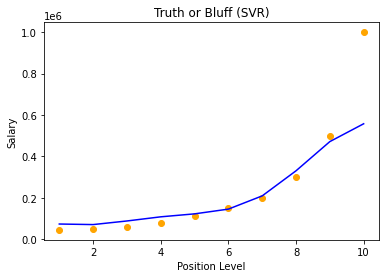

In [13]:
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'orange')
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x).reshape(-1,1)), color = 'blue') #had to reshape this aswell, becasue i was gettitng a 1-D array here instead of 2D
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

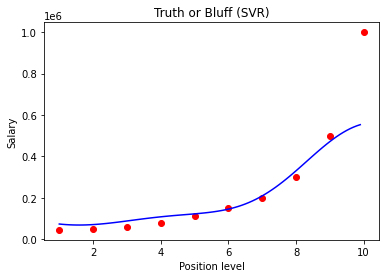

In [18]:
#all of this is completely unecessary it is simply used for a different curve
x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
plt.plot(x_grid, sc_y.inverse_transform(regressor.predict(sc_x.transform(x_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()